**Ghailan and Gordon**

Fall 2023

CS 343: Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from adaline import Adaline

# Set the color style so that Professor Layton can see your plots
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
# Make the font size larger
plt.show()
plt.rcParams.update({'font.size': 18})

# Turn off scientific notation when printing
np.set_printoptions(suppress=True, precision=3)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

# Project 1 | Single-Layer Networks

In this project, you will implement single-layer neural networks that includes the same fundamental components as larger multi-layer networks. You will get familiar with the most common "neural network workflow":
- preprocessing data
- training a neural network
- evaluating test data
- examining performance metrics

We will take advantage of the relative simplicity of single-layer neural networks to analyze and visualize the learned class decision boundaries (*this is more difficult and less intuitive in more complex neural networks that we will study!*).

You will also investigate how the same neural network architecture can be used for both classification and regression with only modest changes.

#### Reminders

- In this class, use `numpy ndarray` (`np.array()`), not Numpy Matrix.
- To help safeguard against data loss when working in a jupyter notebook, make sure the notebook is `Trusted` (Top right corner of notebook when opened in your browser). This will ensure your work autosaves. **I still recommend manually saving at least every few minutes with (Control+S / Cmd+S)**

## Task 1: Implement the ADAptive LInear NEuron (ADALINE) network for binary classification

In Task 1, complete the methods of the `Adaline` class in `adaline.py`. This includes:

- `net_input(self, features)`
- `activation(self, net_in)`
- `compute_loss(self, errors)`
- `compute_accuracy(self, y, y_pred)`
- `gradient(self, errors, features)`

- `predict(self, features)`
- `fit(self, features, y, n_epochs, lr)`

**Important:** Before starting, read through the method descriptions and expected inputs/outputs. It probabily woud be a good idea to tackle simpler/smaller methods first, then use them in more complex ones. For example, it may be a good idea to work on `net_input` first because it is required to complete `fit`. There is test code below.

Here is a summary of the ADALINE network equations

##### Net input

$\vec{x}_i$ is one of the $N$ data sample vectors from the dataset matrix $A$. That is, `x_i.shape = (M,)`.

$$\text{netIn}_i = \sum_{j=1}^M x_{ij} w_j + b$$

##### Net activation

Identity function:

$$ f(x) = x $$

So:

$$\text{netAct}_i = \text{netIn}_i$$


##### Loss: Sum of squared error

$$L(\vec{w}) = \frac{1}{2} \sum_{i=1}^N \left ( y_i - \text{netAct}_i \right )^2 $$

##### Gradient (bias)

$$\frac{\partial L}{\partial b} = -\sum_{i=1}^N \left ( y_i - \text{netAct}_i \right )$$

##### Gradient (wts)

Below, $x_{ij}$ is the $j^{th}$ feature of the data sample vector $\vec{x}_i$.

$$\frac{\partial L}{\partial w_j} = -\sum_{i=1}^N \left ( y_i - \text{netAct}_i \right ) x_{ij}$$

##### Gradient descent (delta rule)

$$b(t+1) = b(t) - \eta \frac{\partial L}{\partial b}$$
$$w_j(t+1) = w_j(t) - \eta \frac{\partial L}{\partial w_j}$$

above $\eta$ is the learning rate, and $N$ is the training set (number of data samples in training epoch).

### 1a. Test your ADALINE implementation

In [2]:
net = Adaline()

#### Test `loss` function

In [3]:
np.random.seed(0)
randErrors = np.array([-0.835,  0.322, -0.381,  0.496, -0.89 , -0.953])
net_act = np.random.rand(len(randErrors))
debugLoss = net.compute_loss(randErrors, net_act)
print(f'Your loss is {debugLoss} and it should be 3.6609344768925496')

Your loss is 3.6609344768925496 and it should be 3.6609344768925496


#### Test `accuracy` function

In [4]:
randClasses1 = np.where(randErrors >= 0, 1, -1)
randClasses2 = np.roll(randClasses1, 1)
acc1 = net.compute_accuracy(randClasses1, randClasses1)
acc2 = net.compute_accuracy(randClasses1, randClasses2)
print(f'Test 1: Your accuracy is {acc1} and it should be 1.0')
print(f'Test 2: Your accuracy is {acc2} and it should be 0.33333333333333337')

Test 1: Your accuracy is 1.0 and it should be 1.0
Test 2: Your accuracy is 0.3333333333333333 and it should be 0.33333333333333337


#### Test `gradient` function

In [5]:
np.random.seed(0)
randFeatures = np.random.normal(loc=0, scale=1, size=(10,3))
randErrors1 = np.random.normal(loc=0, scale=1, size=(10,))
randBiasGrad, randWtGrad = net.gradient(randErrors1, randFeatures)
print(f'Test 1: Your bias gradient is {randBiasGrad} and it should be 0.7839944892482784')
print(f'Test 2: Your wt gradient is {randWtGrad} and it should be [ 0.4   -0.897  7.689]')

Test 1: Your bias gradient is 0.7839944892482784 and it should be 0.7839944892482784
Test 2: Your wt gradient is [ 0.4   -0.897  7.689] and it should be [ 0.4   -0.897  7.689]


#### Test `predict` function

In [6]:
np.random.seed(0)
inputs = np.random.randn(10, 5)
net.wts = np.random.randn(5)
net.b = np.random.randn(1)
y_pred = net.predict(inputs)
print(f'Your predicted classes are {y_pred}.\n            They should be [-1  1  1  1  1 -1  1  1 -1  1]')

Your predicted classes are [-1  1  1  1  1 -1  1  1 -1  1].
            They should be [-1  1  1  1  1 -1  1  1 -1  1]


#### Test `fit` function

In [7]:
np.random.seed(0)
net = Adaline()
inputs = np.random.randn(10, 5)
y = np.sign(np.random.randn(10))
loss, acc = net.fit(inputs, y)
print(f'Your end-of-training loss / accuracy are\n{loss[-1]:.4f} / {acc[-1]}.\nThey should be\n3.9449 / 0.6')
print(f'Your wts after training are:\n{net.get_wts()}\nand should be\n[-0.033  0.33  -0.382 -0.192  0.087]')

Your end-of-training loss / accuracy are
3.9449 / 0.6.
They should be
3.9449 / 0.6
Your wts after training are:
[-0.033  0.33  -0.382 -0.192  0.087]
and should be
[-0.033  0.33  -0.382 -0.192  0.087]


### 1b. Load in and preprocess old faithful data

In this task, you will be working with the old faithful dataset. Here is a description of the dataset:

    Waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA.

    Variables:
    ----------
    sample     numeric      Measurement number
    eruptions  numeric      Eruption time in mins
    waiting    numeric      Waiting time to next eruption
    severe     categorical  Whether the eruption was "severe"
                            (+1: severe, -1 not severe)

Write code to do the following in the below cell.

1. Load in `old_faithful.csv`, represent the data using a ndarray. Select the `eruptions` and `waiting` variables for your features.  Shape = [Num samps, Num features] = [272, 2].
2. Assign the output classes (**severe**) to a separate 1D ndarray vector. Shape=(272,)
3. Preprocess the data by performing min-max normalization across features (i.e. "per-variable"/"separately").
4. Use matplotlib to create a scatter plot of the normalized data, color-coding data points according to their class
5. I suggest using pandas, but you're welcome to do this however you like.

**Make sure that executing the below cell results in an inline scatter plot, color-coded by class.**

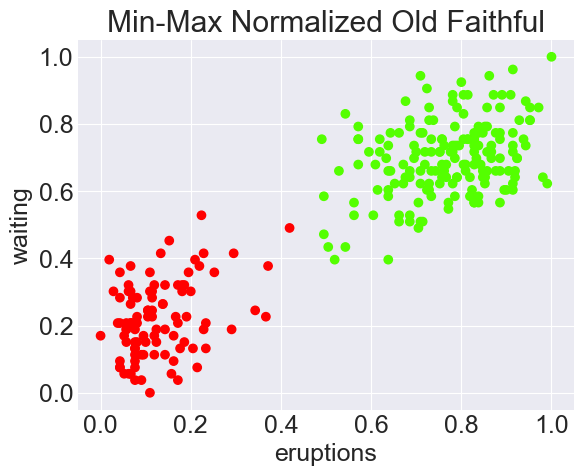

In [8]:
faithful = pd.read_csv('data/old_faithful.csv')
X_pre = faithful[['eruptions','waiting']]
y = faithful[['severe']]
X = (X_pre-X_pre.min(axis = 0))/(X_pre.max(axis = 0)-X_pre.min(axis = 0))
plt.scatter(X[['eruptions']], X[['waiting']], c = y.to_numpy(), cmap = 'prism')
plt.title("Min-Max Normalized Old Faithful")
plt.xlabel("eruptions")
plt.ylabel("waiting");

### 1c. Train ADALINE on normalized Old Faithful data using default hyperparameters (i.e. learning rate, epochs)

Print out the final loss and accuracy, then use the provided function to plot your training results inline in the below cell.

By the final epoch, training loss should reach ~11.36 and accuracy ~100%.

In [9]:
net = Adaline()
loss, acc = net.fit(X.to_numpy(),np.squeeze(y.to_numpy()))
print(loss[-1], acc[-1])

11.355830533901749 1.0


In [10]:
def plot_adaline_train(net, loss_list, acc_list, plotMarkers=False, title='ADALINE'):
    n_epochs = len(loss_list)
    
    x = np.arange(1, n_epochs+1)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(f'{title} ({n_epochs} epochs)')
    
    curveStr = '-r'
    if plotMarkers:
        curveStr += 'o'
    
    ax1.plot(x, loss_list, curveStr)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss (Sum squared error)')
    ax2.plot(x, acc_list, curveStr)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    
    plt.show()


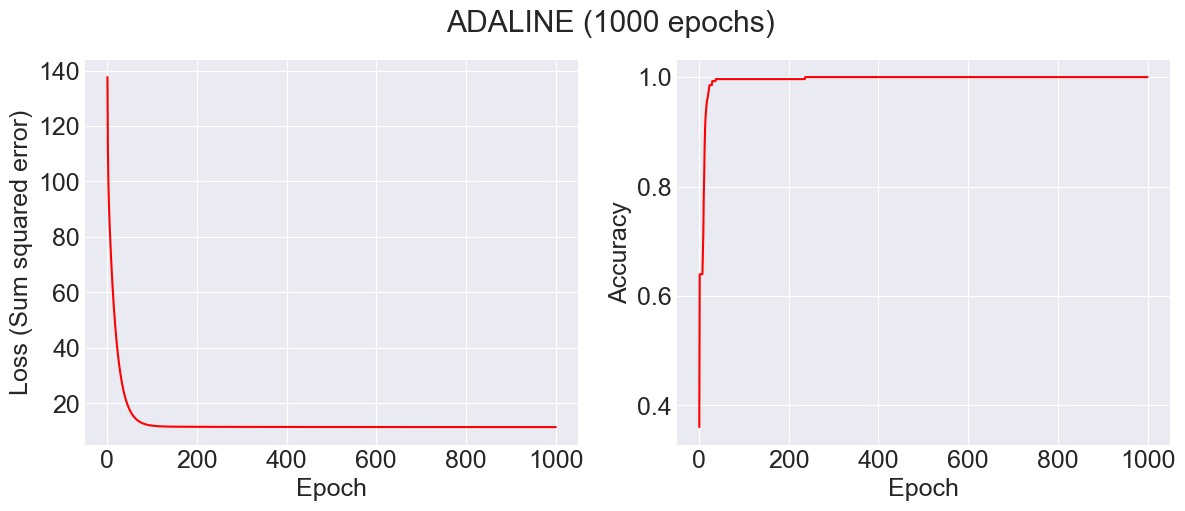

In [11]:
plot_adaline_train(net, loss, acc)

#### Questions

**Question 1.** Based on your loss and accuracy curves, does it look like your network learned to classify the old faithful data? Why or why not?

**Answer 1:** It appears that the network learned to classify the old faithful data, however because we failed to split our data and the set is fairly small this could generalize poorly to new data.

## Task 2: Feature scaling and hyperparameters -- WHY IS IT THE SAME


### 2a. Feature scaling

Copy your code from Task 1 to import the Old Faithful data, but this time don't normalize before training.

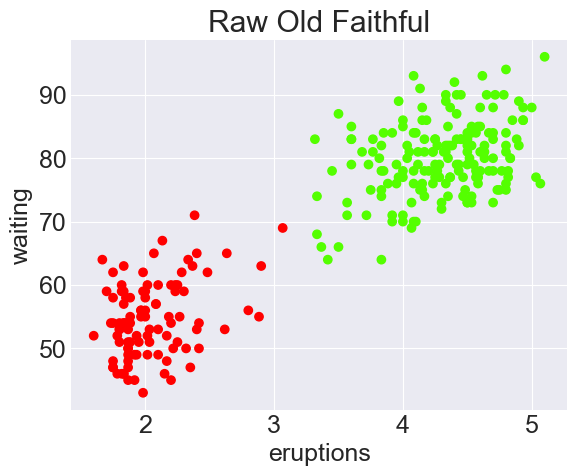

In [12]:
faithful2 = pd.read_csv('data/old_faithful.csv')
X = faithful2[['eruptions','waiting']]
y = faithful2[['severe']]
plt.scatter(X[['eruptions']], X[['waiting']], c = y.to_numpy(), cmap = 'prism')
plt.title("Raw Old Faithful")
plt.xlabel("eruptions")
plt.ylabel("waiting");

8.386021950524951e+120 0.6397058823529411


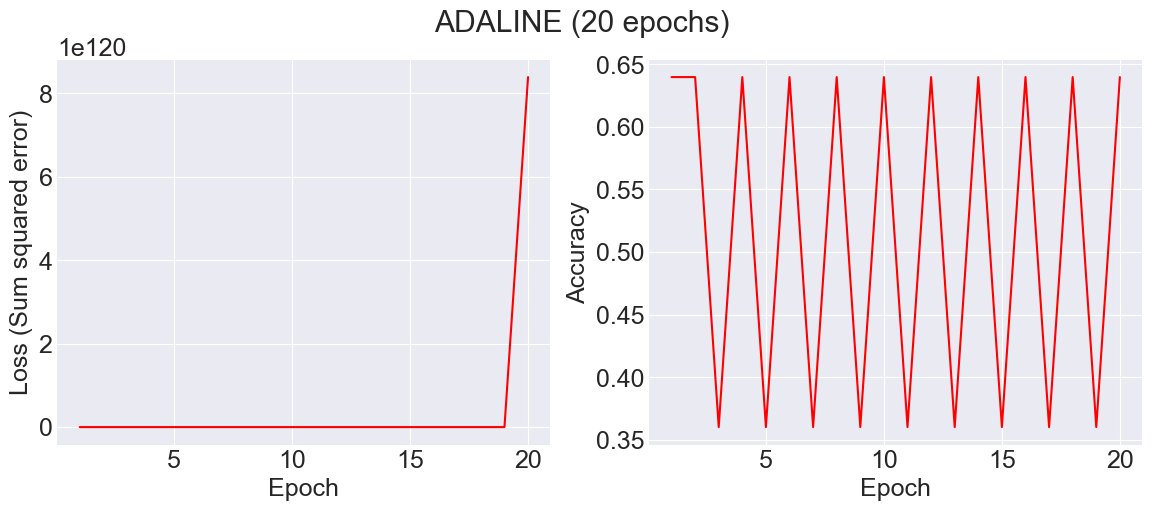

In [13]:
net = Adaline()
loss, acc = net.fit(X.to_numpy(),np.squeeze(y.to_numpy()),n_epochs = 20)
print(loss[-1], acc[-1])
plot_adaline_train(net, loss[:20], acc[:20]);

#we run for fewer epochs because loss diverges beyond expression shortly after epoch 20

#### Questions

**Question 2.** What happens to the loss when we don't normalize the features before training? Why?

**Answer 2:** 

Big problems. We believe this is due to the gradient not being symmetrical this leads to the network having a hard time going down the hill without over stepping leading to it barreling out.

### 2b. Test how individually standardizing your features affects the rate at which loss decreases over epochs

1. Write code in the cell below to train the network on standardized features. Recall that standardizing a variable means applying the transformation $\frac{x - \mu}{\sigma}$. The mean and standard deviation should be computed over the entire dataset and separately per feature.
2. Plot the loss and accuracy.

**The cell should generate an inline pair of plots when executed**.

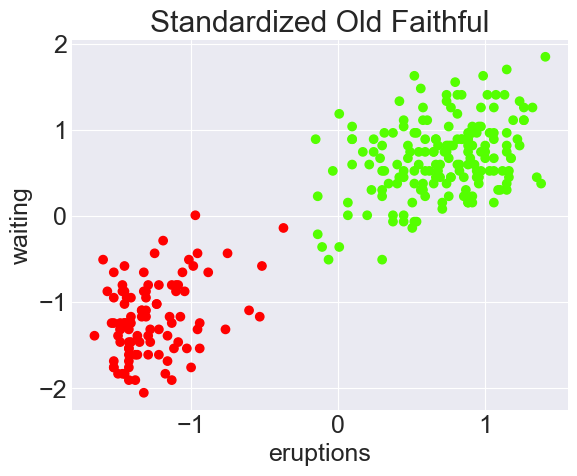

In [14]:
faithful = pd.read_csv('data/old_faithful.csv')
X_pre = faithful[['eruptions','waiting']]
y = faithful[['severe']]
X_stand = (X_pre - X_pre.mean(axis = 0))/(X_pre.std(axis = 0))
plt.scatter(X_stand[['eruptions']], X_stand[['waiting']], c = y.to_numpy(), cmap = 'prism')
plt.title("Standardized Old Faithful")
plt.xlabel("eruptions")
plt.ylabel("waiting");

11.352774233866423 1.0


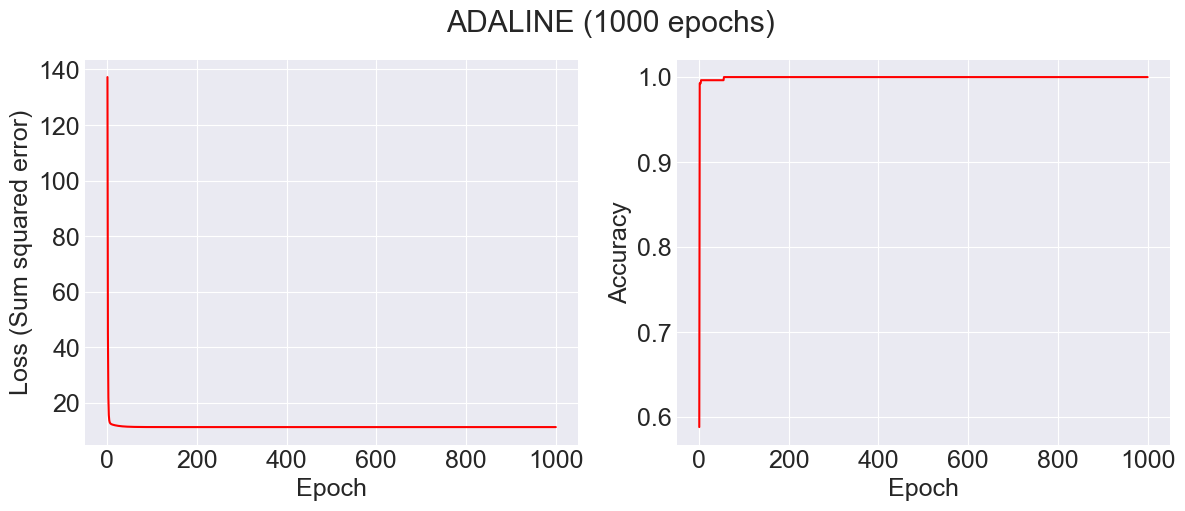

In [15]:
net = Adaline()
loss, acc = net.fit(X_stand.to_numpy(),np.squeeze(y.to_numpy()))
print(loss[-1], acc[-1])
plot_adaline_train(net, loss, acc)

#### Questions

**Question 3.** Explain the similarities/differences in loss and accuracy curves between these plots and those that you made in Task 1.

**Answer 3:** We ultimately get the same accuracy but the rate at which it is achieved is faster. The loss function also drops quicker than in task 1 and this is due to the better standrdizing which makes it easier for the network to climb down the hill faster and safer


### 2c. Influence of learning rate

This subtask focuses on the influence of learning rate (a model **hyperparameter**) on the quality of neural network training.

#### Questions

**Question 4:** Make small changes to the learning rate hyperparameter below. How does it affect the loss?

**Question 5:** What happens if the learning rate is increased by several orders of magnitude? How does it affect the loss? Can you explain why?

**Answer 4:** As we increase our learning rate by a small amount, the loss initially has little shift, but quickly becomes infinitely large (from 0.001 to 0.005 it goes from loss = 11 to infinity). Our understanding is that this is the "barrelling out" which was discussed in class.

**Answer 5:** When learning rate is increased by several orders of magnitude the loss increases enormously and barrels out as described in answer 4. This is due to the function "stepping over" the minimum, and then stepping into a divergent portion of the loss function.

In [16]:
def test_over_lr(net,lrs, X, y):
    """
    net: network to test over
    lrs: iterable of learning rates to test
    X: features (ndarray)
    y: labels (ndarray)
    
    returns: 
    results: python dictionary of lr: [loss, acc] pairs.
    """
    results = {}
    
    for lr in lrs:
        loss, acc = net.fit(X,y, lr = lr)
        results[lr] = [loss[-1], acc[-1]]
    
    return results
    


net = Adaline()
faithful = pd.read_csv('data/old_faithful.csv')
X_pre = faithful[['eruptions','waiting']]
y = faithful[['severe']]
X = (X_pre-X_pre.min(axis = 0))/(X_pre.max(axis = 0)-X_pre.min(axis = 0))
X = X.to_numpy()
y = np.squeeze(y.to_numpy())
lrs = [0.001, 0.002,0.003,0.004, 0.005]

results = test_over_lr(net, lrs, X, y)

print(results);


#now do with lr = 0.002

{0.001: [11.355961253875591, 1.0], 0.002: [11.352814300670163, 1.0], 0.003: [11.35277474134304, 1.0], 0.004: [11.352774240779027, 1.0], 0.005: [1.3624552938303462e+172, 0.6397058823529411]}


### 2d. Visualize class boundaries

For this subtask, you will plot the boundary between points (`eruptions`, `waiting` feature pairs) that get classified as severe (+1) or not (-1). To get there, fill in the blanks and answer the questions below.

In [17]:
# Print your learned wts and bias here after training net on standardized samples
faithful = pd.read_csv('data/old_faithful.csv')
X_pre = faithful[['eruptions','waiting']]
y = faithful[['severe']]
X_stand = (X_pre - X_pre.mean(axis = 0))/(X_pre.std(axis = 0))
net = Adaline()
loss, acc = net.fit(X_stand.to_numpy(),np.squeeze(y.to_numpy()))
print(net.get_wts(), net.get_bias())


[0.705 0.229] 0.27941176470588186


#### Questions

**Question 6.** What is the meaning of each of the above learned weights with respect to the variables/features in the dataset?

*Hint:* Look at your `net_in` equation, look at the features that you feed into the model, look at the scatterplot you made in 1b, think about what features are present in a single training sample.

**Question 7.** Which feature / weight index corresponds to the "y axis value" in your scatterplot from 1b?

**Answer 6:** the wts tell us how much each feature plays in determining the classification of each sample so the first weight [0.705] tells us that the first feature plays a huge role in determining what class the sample belongs to while the second wt [0.229] tells us the second feature plays a small part in determining the class of the sample. The bias wt just re-centers our data so that we do not have to go through the orgin.

**Answer 7:** the feature "waiting" is on the y-axis and its wts is the second so [0.229]

#### Transform weights for plotting

The class boundary equation is $0 = w_0 + w_1 \times x_i + w_2 \times y_i$ for sample $i$ in our data ($i$ goes to 272). But to plot it, we need an equation that looks like $y_i = m \times x_i + b$ where $m$ and $b$ are some combinations of our weights.

1. Scale the weights so that the one corresponding to the "y value" is set to 1, then solve for $y$ (*It might be helpful to work this out by hand*). Once you do, adjust the sign/scale of your weights in code so they match up with the equation you wrote out by hand ( of form $y_i = m \times x_i + b$). **Be careful about the order in which you manipulate the bias and weight values when setting up your equation.**
2. Once you're done, have the cell below print your transformed weights/bias.

In [18]:
wts = net.get_wts()
b = net.get_bias()

print(wts)
scale = 1/wts[1]
wts = wts*scale
print(wts)
b = b*scale
print(b)

# TODO: Adjust weights for plotting, then print them here
print("transformed weights: "+ str(wts), "transformed bias: "+str(b))

[0.705 0.229]
[3.076 1.   ]
1.218549731701404
transformed weights: [3.076 1.   ] transformed bias: 1.218549731701404


In the cell below, sample 50 equally spaced x values from -1.5 to 1.5 for plotting the class boundary. Given the `x_i` values, generate `y_i` values using the equation $y_i = m \times x_i + b$ (using your transformed weights from above). 

**Executing the code below should produce a graph that clearly shows this class boundary superimposed on your data scatter plot.**

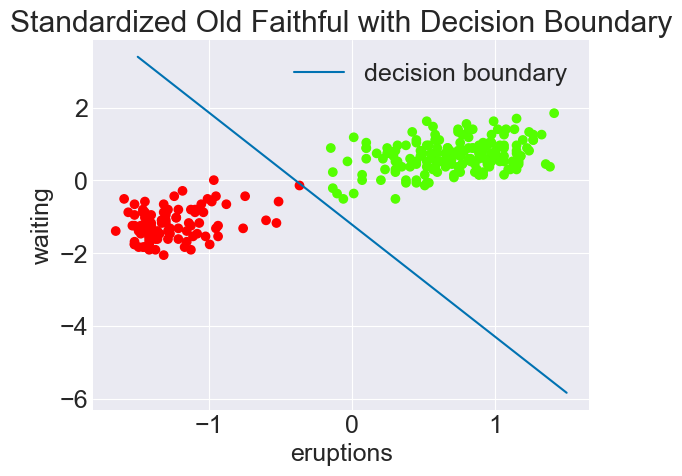

In [19]:
x_i = np.linspace(-1.5,1.5, 200)
y_i = -wts[0]*x_i-b

plt.plot(x_i,y_i, label = "decision boundary")
plt.scatter(X_stand[['eruptions']], X_stand[['waiting']], c = y.to_numpy(), cmap = 'prism')
plt.title("Standardized Old Faithful with Decision Boundary")
plt.xlabel("eruptions")
plt.ylabel("waiting")
plt.legend();

## Task 3: Perceptron: A neural network with a different activation function

In this task, you will apply ADALINE to a larger dataset ([Ionosphere dataset](https://archive.ics.uci.edu/dataset/52/ionosphere)) and compare the performance of ADALINE with another binary classification neural network . A **Perceptron** is a single-layer neural network that works exactly the same as ADALINE, except it uses a different network activation function (`netAct`). The activation function computes the `netAct` as follows:

$$\text{netAct}_i = f(\text{netIn}_i) = 1  \text{ if netIn}_i \geq 0$$
$$\text{netAct}_i = f(\text{netIn}_i) = -1 \text{ if netIn}_i < 0$$

### 3a. Implement and test a Perceptron

1. Create a new class in `adaline.py` that will represent your Perceptron classifier. It should inherit from `Adaline`. Override/write any necessary functions. **Hint:** This should be really quick, short, and simple.
2. In the cell below, train your Perceptron on the same standardized Old Faithful data by making loss and accuracy plots like you have been using in previous tasks (*though you should replace the default title in `plot_adaline_train` with Perceptron*).

If everything is working, you should get very similar results with your Perceptron as above with ADALINE.

In [20]:
from adaline import Perceptron

def plot_perceptron_train(net, loss_list, acc_list, plotMarkers=False, title='PERCEPTRON'):
    n_epochs = len(loss_list)
    
    x = np.arange(1, n_epochs+1)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(f'{title} ({n_epochs} epochs)')
    
    curveStr = '-r'
    if plotMarkers:
        curveStr += 'o'
    
    ax1.plot(x, loss_list, curveStr)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss (Sum squared error)')
    ax2.plot(x, acc_list, curveStr)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    
    plt.show()


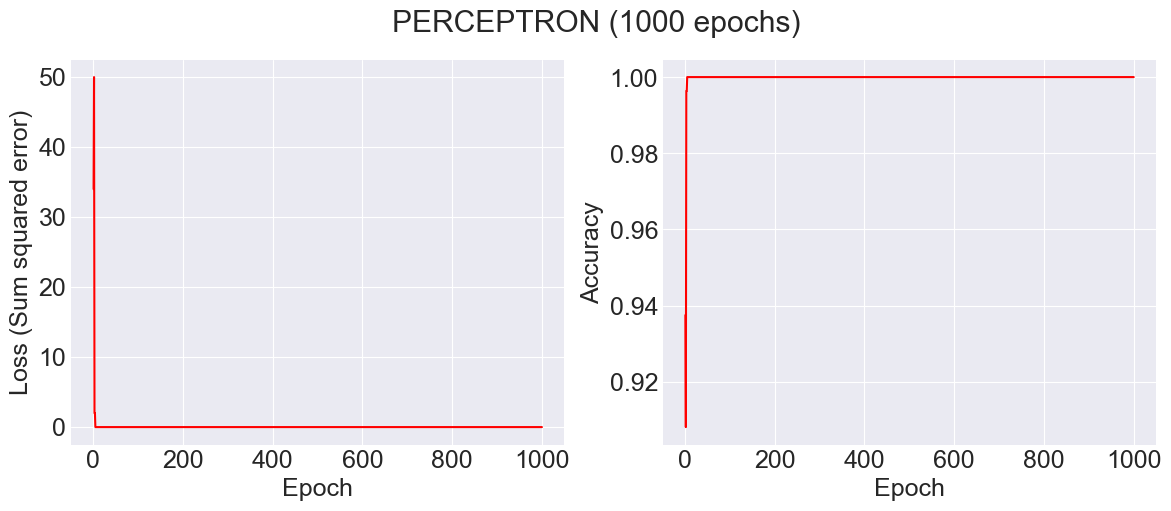

0.0 1.0


In [21]:
faithful = pd.read_csv('data/old_faithful.csv')
X_pre = faithful[['eruptions','waiting']]
y = faithful[['severe']]
X_stand = (X_pre - X_pre.mean(axis = 0))/(X_pre.std(axis = 0))
perc = Perceptron()

loss, acc = perc.fit(X_stand.to_numpy(),np.squeeze(y.to_numpy()))

plot_perceptron_train(perc, loss, acc)
print(loss[-1], acc[-1])

### 3b. Compare performance between ADALINE and Perceptron on Ionosphere dataset

Your goal is to train, compare, and analyze the performance of your ADALINE and Perceptron networks on the Ionosphere dataset.

The [Ionosphere dataset](https://archive.ics.uci.edu/dataset/52/ionosphere) is radar signal data collected in Goose Bay, Labrador. It is a more complex dataset than old faithful, with 33 features (but still 2 classes). The class values are coded 'g' for good radar signal and 'b' for bad radar signal.

**Please download the CSV file from the CS343 project website (not above UCI link)** — I have slightly modified the dataset for your convenience.

**TODO:**
1. Load in and normalize the Ionosphere dataset. Note that there are no headers in the CSV file and the class values are specified in the last column — **make sure that they are coded properly** (i.e. $-1$ and $+1$).
2. In the cell below, use the provided `plot_nets_train` helper function to create a 1x2 plot showing training loss and accuracy of the two networks.

I encourage you to play with the hyperparameters, but a good starting point is a learning rate of `1e-5` and 100 training epochs.

In [22]:
def plot_nets_train(loss_lists, acc_lists, net_names, plotMarkers=False):
    '''Creates a 1x2 grid of plots showing loss over epochs (left column) and
    accuracy over epochs (right column) for one or more network (num_nets in total).
    Generalizes `plot_adaline_train` for multiple trained networks.
    
    For example, in the case of two networks (e.g. adaline and perceptron; num_nets=2),
    there would be two curves in each of the two plots.
    
    Put differently, the following function call would produce the same pair of plots you've
    been getting up until this point with a single adaline network:
        plot_adaline_train(loss_lists[0], acc_lists[0])
    
    Parameters:
    -----------
    loss_lists: Python lists of ndarrays. len(loss_lists) = num_nets. len(loss_lists[0]) = n_epochs.
        This would be a list of the loss histories for each of the nets being plotted.
    acc_lists: Python lists of ndarrays. len(acc_lists) = num_nets. len(acc_lists[0]) = n_epochs.
        This would be a list of the accuracy histories for each of the nets being plotted.
    net_names: Python list of str. len(net_names) = num_nets.
        Identifying names of each net (e.g. for legend).
    plotMarkers: boolean.
        Should we draw a plot marker at each epoch on each curve?
    '''
    n_nets = len(net_names)
    n_epochs = len(loss_lists[0])
    
    colors = ['orange', 'blue', 'red']
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(f'{n_nets} networks trained for ({n_epochs} epochs)')
    
    for loss_list, acc_list, color in zip(loss_lists, acc_lists, colors):
        x = np.arange(1, n_epochs+1)

        curveStr = '-'
        if plotMarkers:
            curveStr += 'o'

        ax1.plot(x, loss_list, curveStr, c=color)
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss (Sum squared error)')
        ax2.plot(x, acc_list, curveStr, c=color)
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
    
    plt.legend(net_names)
    plt.show()

In [23]:
#load in ionosphere data

ion_raw = pd.read_csv('data/ionosphere.csv', header = None, names = np.arange(34))
y_ion = ion_raw[33].map({'g':1, 'b':-1}).to_numpy()
ion_np = ion_raw.drop(33, axis=1).to_numpy()
ion_stand = (ion_np - ion_np.mean(axis = 0))/(ion_np.std(axis = 0))


In [24]:
per_ion = Perceptron()
ada_ion = Adaline()

P_loss_ion, p_acc_ion = per_ion.fit(ion_stand,y_ion, 100, 0.00001)
ada_loss_ion, ada_acc_ion = ada_ion.fit(ion_stand,y_ion, 100, 0.00001)
print(p_acc_ion[99], ada_acc_ion[99])

0.8945868945868946 0.8774928774928775


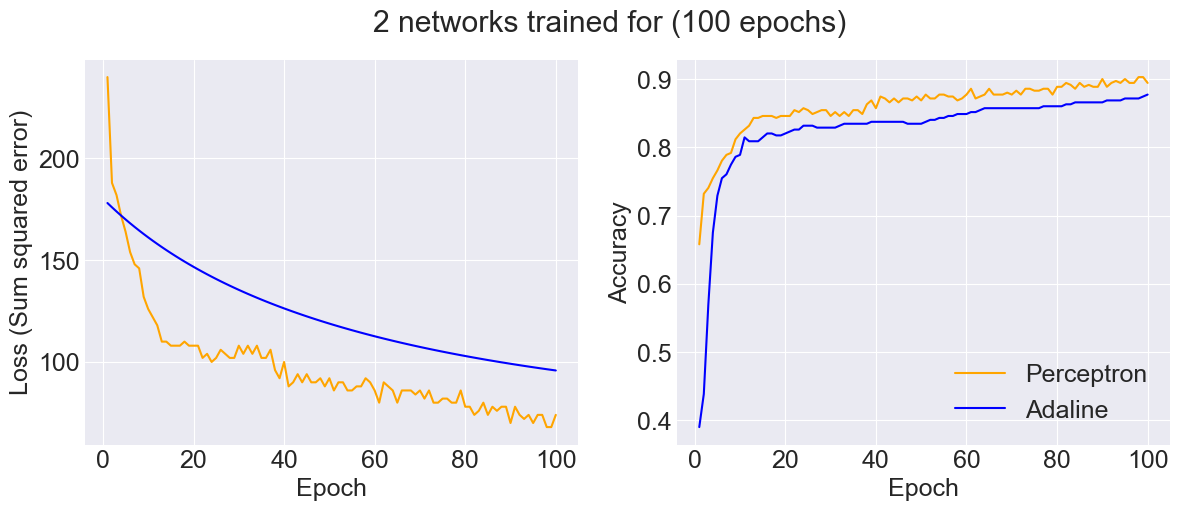

In [25]:
plot_nets_train([P_loss_ion, ada_loss_ion], [p_acc_ion, ada_acc_ion], ["Perceptron", "Adaline"])

#### Questions

**Question 8.** What accuracy are you able to achieve on the Ionosphere dataset with each networks at the end of training?

**Question 9.**<br/>(a) What happens when you increase the learning rate by 1+ order of magnitude in each network?<br/>(b) What happens when you decrease the learning rate by 1+ order of magnitude in each network? *You will likely need to increase the number of training epochs too.*<br/>(c) Interpret the difference in behavior between the two nets.

#### Answers

**Answer 8:** We were able to achieve a accuracy of ~ 89.46 using perceptron and ~88.32 using adaline

**Answer 9:**  (a) by increasing the learning rate by 1 magnitude the accuracy increased for both with both hitting around ~90 but if increased by another one the adaline crashes to 70 while perceptron stays steady at 90

(b) by decreasing the learning rate by 1 magnitude the accuracy for adaline crashed to 70 even with the epochs going to 1000 the perceptron also dropped but only to 80. if the rate is futher reduced by another 1 magnitude they both drop to around 60

(c) I believe that perceptron is more resilient to a big change in learning rate while adaline is more sensitive to a big change in learning rate. I believe this is due to the differance in thier act functions.